<a href="https://colab.research.google.com/github/liuyx211/CS230-Project/blob/main/milestone_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/tensorflow/examples.git
!pip install imgaug==0.4.0
!pip install -U tensorflow-addons

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-cq08__5d
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-cq08__5d
  Created wheel for tensorflow-examples: filename=tensorflow_examples-ec3e02a33d087331c76a5f3c2d427b4cf965745e_-py3-none-any.whl size=268138 sha256=250a28ba73e6a14d991f4fa3adf6ba5d913a36d620c63a9a909240d1c5adacd1
  Stored in directory: /tmp/pip-ephem-wheel-cache-omvploi_/wheels/eb/19/50/2a4363c831fa12b400af86325a6f26ade5d2cdc5b406d552ca
Failed to build tensorflow-examples
    Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.
     |████████████████████████████████| 948 kB 5.5 MB/s 
  Attempting uninstall: imgaug

In [ ]:
import numpy as np
import datetime
import random
import os

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications, optimizers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from tensorflow_examples.models.pix2pix import pix2pix

import json
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.segmaps import SegmentationMapsOnImage

from sklearn.model_selection import train_test_split
from IPython.display import clear_output

import xml.etree.ElementTree as ET

image_size = 224

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path = '/content/drive/MyDrive/newCS230/newdataset'
label_path = '/content/drive/MyDrive/newCS230/new_positive_labels'
secondary_path = '/content/drive/MyDrive/newCS230/non-card'

In [ ]:
images = []
labels = []
for f in os.listdir(f"{image_path}"):
    image_file = f"{image_path}/{f}"
    img_array = img_to_array(load_img(image_file), dtype='uint8')
    img_array = tf.image.resize(img_array, (image_size, image_size), antialias=False)
    images.append(img_array)
    
    label_file = f"{label_path}/{f[:-5]}.xml"
    try:
        tree = ET.parse(label_file)
        labels.append(1)
    except:
        print(label_file)
        labels.append(0)

############################################################
for f in os.listdir(f"{secondary_path}"):
    image_file = f"{secondary_path}/{f}"
    img_array = img_to_array(load_img(image_file), dtype='uint8')
    img_array = tf.image.resize(img_array, (image_size, image_size), antialias=False)
    images.append(img_array)
    labels.append(0)

#    img_mask_array = np.load(mask_file)
#    masks.append(img_mask_array['arr_0'])
#images = np.array(images)
#masks = np.array(masks)
#masks = np.array(masks>0, dtype='uint8')

/content/drive/MyDrive/newCS230/new_positive_labels/184.xml
/content/drive/MyDrive/newCS230/new_positive_labels/175.xml
/content/drive/MyDrive/newCS230/new_positive_labels/158.xml
/content/drive/MyDrive/newCS230/new_positive_labels/151.xml
/content/drive/MyDrive/newCS230/new_positive_labels/152.xml
/content/drive/MyDrive/newCS230/new_positive_labels/205.xml
/content/drive/MyDrive/newCS230/new_positive_labels/170.xml
/content/drive/MyDrive/newCS230/new_positive_labels/155.xml
/content/drive/MyDrive/newCS230/new_positive_labels/201.xml
/content/drive/MyDrive/newCS230/new_positive_labels/188.xml
/content/drive/MyDrive/newCS230/new_positive_labels/177.xml
/content/drive/MyDrive/newCS230/new_positive_labels/181.xml
/content/drive/MyDrive/newCS230/new_positive_labels/156.xml
/content/drive/MyDrive/newCS230/new_positive_labels/183.xml
/content/drive/MyDrive/newCS230/new_positive_labels/190.xml
/content/drive/MyDrive/newCS230/new_positive_labels/113.xml
/content/drive/MyDrive/newCS230/new_posi

In [ ]:

images = np.array(images)
images = np.array(images/255.0, dtype='float32')
labels = np.array(labels)
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.3, random_state=1)

In [ ]:
print(images.shape)
print(y_val.shape)
print(np.sum(y_val)/y_val.shape[0])

(385, 224, 224, 3)
(116,)
0.43103448275862066


In [ ]:
all_models = []
all_histories = []
for i in range(1):
  model = Sequential()
  model.add(Conv2D(64, (3, 3), activation = "relu"))
  model.add(Conv2D(64, (3, 3), activation = "relu"))
  model.add(MaxPool2D(pool_size=(3, 3)))
  model.add(Flatten())
  model.add(Dense(16, activation = "relu"))
  model.add(Dense(1, activation = "sigmoid"))

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
  history = model.fit(x_train, y_train, epochs=8, validation_split=0.25, batch_size = 40)
  all_models.append(model)
  all_histories.append(history)

Epoch 1/8
6/6 [==============================] - 72s 12s/step - loss: 4.4717 - accuracy: 0.5423 - val_loss: 0.7880 - val_accuracy: 0.4706
Epoch 2/8
6/6 [==============================] - 70s 11s/step - loss: 0.6803 - accuracy: 0.5771 - val_loss: 0.6360 - val_accuracy: 0.6912
Epoch 3/8
6/6 [==============================] - 70s 12s/step - loss: 0.6329 - accuracy: 0.7562 - val_loss: 0.6668 - val_accuracy: 0.5882
Epoch 4/8
6/6 [==============================] - 71s 12s/step - loss: 0.6046 - accuracy: 0.7264 - val_loss: 0.5325 - val_accuracy: 0.8382
Epoch 5/8
6/6 [==============================] - 69s 11s/step - loss: 0.4952 - accuracy: 0.7811 - val_loss: 0.4027 - val_accuracy: 0.8088
Epoch 6/8
6/6 [==============================] - 69s 11s/step - loss: 0.3788 - accuracy: 0.8060 - val_loss: 0.4328 - val_accuracy: 0.8382
Epoch 7/8
6/6 [==============================] - 70s 11s/step - loss: 0.3004 - accuracy: 0.8458 - val_loss: 0.3910 - val_accuracy: 0.8382
Epoch 8/8
6/6 [===================

In [ ]:
for i in range(1):
  all_models[i].evaluate(x_val, y_val)

4/4 [==============================] - 9s 2s/step - loss: 0.3186 - accuracy: 0.8879


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


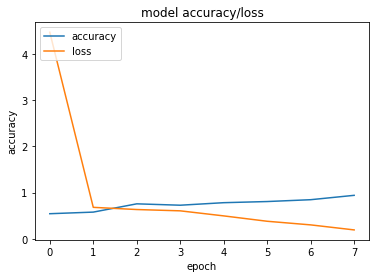

In [ ]:

plt.plot(all_histories[0].history['accuracy'])
plt.plot(all_histories[0].history['loss'])
plt.title('model accuracy/loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [ ]:
all_models[0].save("/content/drive/MyDrive/newCS230/fourth_model211101_8879")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/newCS230/fourth_model211101_8879/assets


In [ ]:
model2 = keras.models.load_model("/content/drive/MyDrive/newCS230/fourth_model211101_8879")
x_train2, x_val2, y_train2, y_val2 = train_test_split(images, labels, test_size=0.3, random_state=2)
model2.evaluate(x_val2, y_val2)

4/4 [==============================] - 9s 2s/step - loss: 0.3101 - accuracy: 0.9138


[0.3101004958152771, 0.9137930870056152]